# Lab 2: Markov Decision Problems

# Exercise 1: Grid World
Compute the value funnction for the example 4.1 in the book.







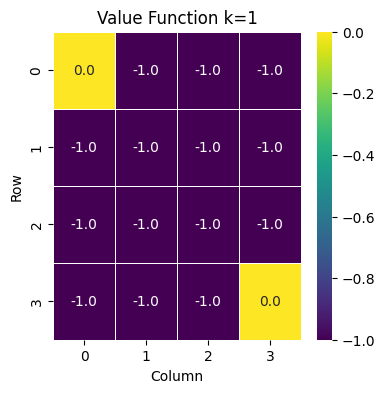

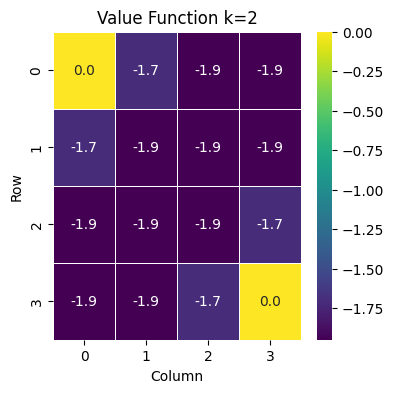

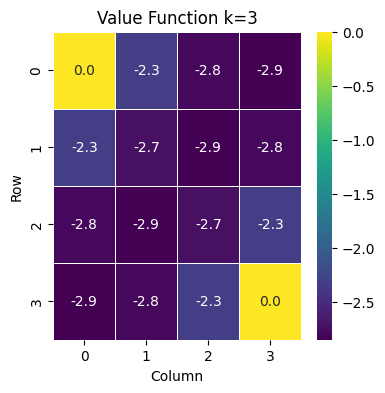

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_next_state(s, a, n=4):
    row, col = divmod(s, n)  # turn 0..15 into (row,col)

    if a == 0:   # up
        if row > 0:
            row -= 1
    elif a == 1: # down
        if row < n-1:
            row += 1
    elif a == 2: # left
        if col > 0:
            col -= 1
    elif a == 3: # right
        if col < n-1:
            col += 1

    return row * n + col

V = np.zeros(16) #value function for the 16 states
gamma = 0.95  # Discount factor
V_old = np.zeros(16)

for k in range(3): # outer loop that runs iterative eval 3 times
  for s in range(16): #inner loop that loops over each state

    if s==0 or s==15:
      continue

    #### Write your code here #########
    v = 0.0
    for a in range(4):   # 0=up,1=down,2=left,3=right
        next_s = get_next_state(s, a)
        reward = -1
        v += 0.25 * (reward + gamma * V_old[next_s])
    V[s] = v

  V_old = V.copy()

  ###### PLOT
  # Reshape the 1D value function array into an 8x8 grid
  V_grid = V.reshape((4, 4))

  # Plot the value function as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
  plt.title("Value Function k=%d"%(k+1))
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.show()

# Exercise 2: Grid World
Compute the optimal policy




In [10]:
def get_next_state(s, a, n=4):
    row, col = divmod(s, n)  # turn 0..15 into (row,col)

    if a == 0:   # up
        if row > 0:
            row -= 1
    elif a == 1: # down
        if row < n-1:
            row += 1
    elif a == 2: # left
        if col > 0:
            col -= 1
    elif a == 3: # right
        if col < n-1:
            col += 1

    return row * n + col

V = np.zeros(16) #value function for the 16 states
gamma = 0.95  # Discount factor
V_old = np.zeros(16)

for k in range(3): # outer loop that runs iterative eval 3 times
  for s in range(16): #inner loop that loops over each state

    if s==0 or s==15:
      continue

    #### Write your code here #########
    v = 0.0
    for a in range(4):   # 0=up,1=down,2=left,3=right
        next_s = get_next_state(s, a)
        reward = -1
        v += 0.25 * (reward + gamma * V_old[next_s])
    V[s] = v

  V_old = V.copy()

#left plotting in last code block

actions = ['↑','↓','←','→']
policy = []

for s in range(16):
    if s == 0 or s == 15:     # terminal states
        policy.append('T')
        continue

    q_vals = []
    for a in range(4):
        next_s = get_next_state(s, a)
        reward = -1
        q_vals.append(reward + gamma * V[next_s])

    best_a = np.argmax(q_vals)
    policy.append(actions[best_a])

# print as a 4x4 grid
for i in range(4):
    print(policy[i*4:(i+1)*4])

['T', '←', '←', '↓']
['↑', '↑', '←', '↓']
['↑', '↑', '↓', '↓']
['↑', '→', '→', 'T']


# Exercise 3: Grid World
In the following gym environment, compute the value function using Monte Carlo.

Run the following code in your local machine. You can run in on colab, but you will not see the animation.

In [ ]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

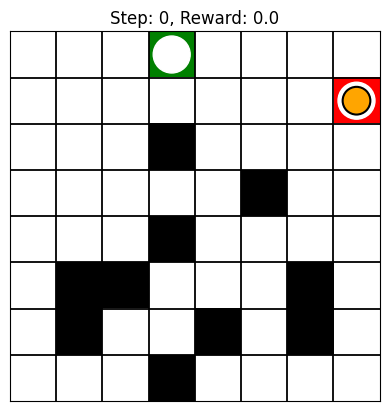

Location (1,6) t=0 reward=0.0
Location (1,7) t=1 reward=0.0
Location (2,7) t=2 reward=0.0
Location (3,7) t=3 reward=0.0
Location (3,6) t=4 reward=0.0
Location (2,6) t=5 reward=0.0
Location (2,5) t=6 reward=0.0
Location (2,5) t=7 reward=-1.0
Location (2,4) t=8 reward=0.0
Location (1,4) t=9 reward=0.0


In [ ]:

import gymnasium as gym
import gym_simplegrid

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='human')
obs, info = env.reset(seed=1, options=options)
done = env.unwrapped.done

for t in range(10):
    if done:
        break
    action = env.action_space.sample()   # Random action
    obs, reward, done, _, info = env.step(action)

    grid_size = 8
    row = obs // grid_size
    col = obs % grid_size
    print("Location (", row, ",", col, ") t=",t, " reward=", reward, sep="")

# env.close()